In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print mnist.train.images.shape, mnist.train.labels.shape

(55000, 784) (55000, 10)


In [4]:
INPUT_UNITS = 784
HIDDEN_UNITS = [256]
ENCODED_UNITS = 128

LEARNING_RATE = 1e-3
TRAINING_ITER = 2000
BATCH_SIZE = 100

def init_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def init_biases(shape):
    return tf.Variable(tf.zeros(shape) + 0.1)

def add_layer(x, weights, biases, activation_function = None):
    scores = tf.matmul(x, weights) + biases
    
    if activation_function:
        return activation_function(scores)
    else:
        return scores

weights = {
    'encoder_l1': init_weights([INPUT_UNITS, HIDDEN_UNITS[0]]), 
    'encoder_l2': init_weights([HIDDEN_UNITS[0], ENCODED_UNITS]),
    'decoder_l1': init_weights([ENCODED_UNITS, HIDDEN_UNITS[0]]),
    'decoder_l2': init_weights([HIDDEN_UNITS[0], INPUT_UNITS])
}

biases = {
    'encoder_l1': init_biases([HIDDEN_UNITS[0]]), 
    'encoder_l2': init_biases([ENCODED_UNITS]),
    'decoder_l1': init_biases(HIDDEN_UNITS[0]),
    'decoder_l2': init_biases([INPUT_UNITS])
}

def encoder(x):
    encoder_h1 = add_layer(x, weights['encoder_l1'], biases['encoder_l1'], tf.nn.relu)
    return add_layer(encoder_h1, weights['encoder_l2'], biases['encoder_l2'], tf.nn.relu) 

def decoder(x):
    decoder_h1 = add_layer(x, weights['decoder_l1'], biases['decoder_l1'], tf.nn.relu)
    return add_layer(decoder_h1, weights['decoder_l2'], biases['decoder_l2'], tf.nn.relu)

x = tf.placeholder(tf.float32, [None, 784])

encoder_op = encoder(x)
x_ = decoder(encoder_op)

loss = tf.reduce_mean(tf.square(x - x_))

train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)


0.200395
0.0587475
0.039646
0.0379133
0.0267893
0.026916
0.0215286
0.0191278
0.0185347
0.0168091
0.0186432
0.018459
0.0159615
0.0166012
0.0161047
0.0142662
0.0149797
0.0151406
0.0143366
0.0143979
0.0138252
0.0138254
0.0128702
0.0133265
0.0130669
0.0127066
0.0140361
0.012641
0.013777
0.0137268
0.0132932
0.0122787
0.011369
0.0119215
0.0114884
0.0122204
0.0121677
0.0114692
0.0120117
0.0117096


<IPython.core.display.Javascript object>


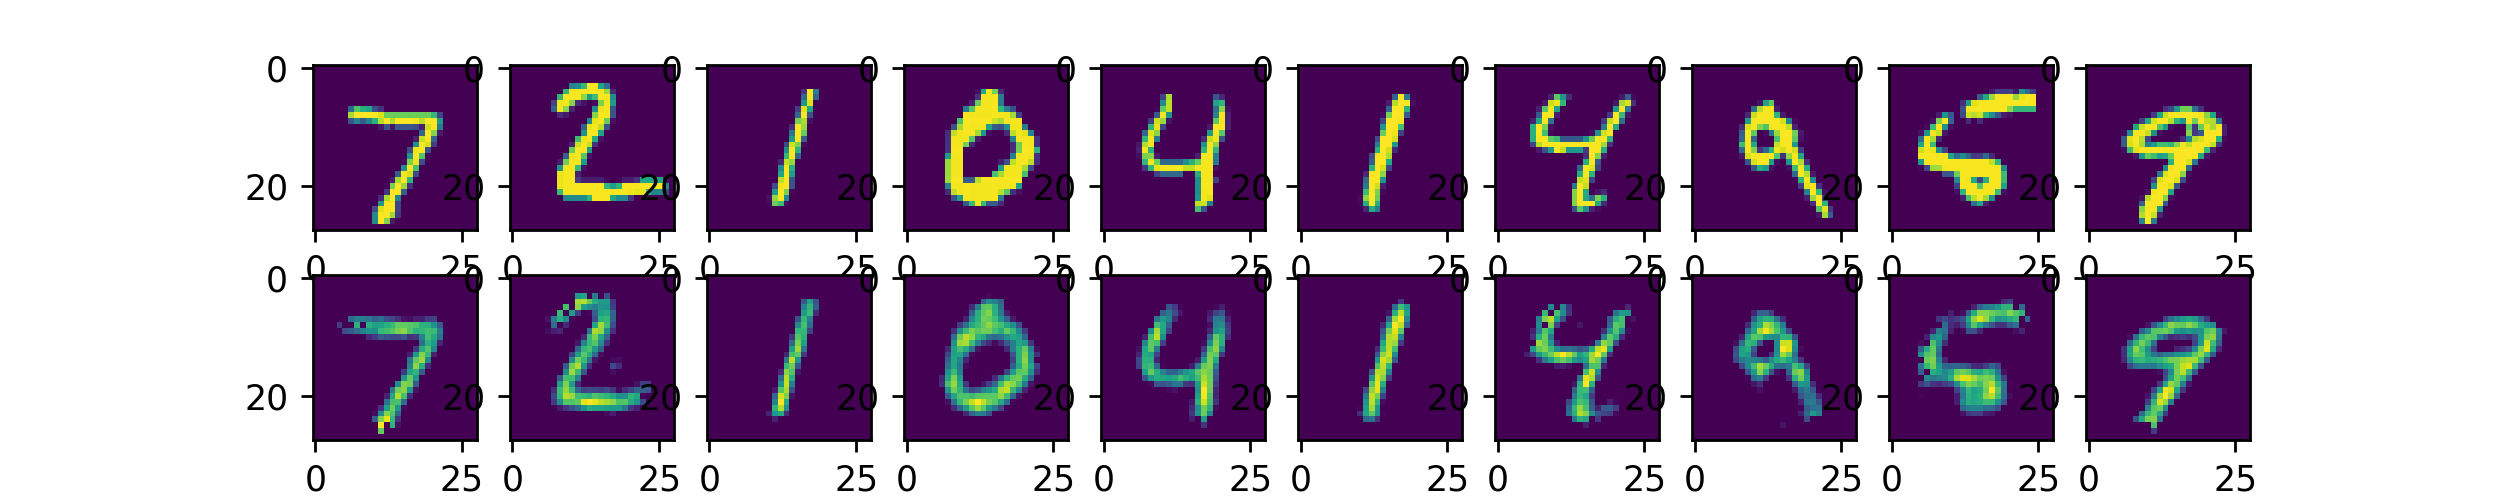

In [5]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(TRAINING_ITER):
        batch_xs, _ = mnist.train.next_batch(BATCH_SIZE)
        sess.run(train_step, feed_dict = {x: batch_xs})
        if i % 50 == 0:
            print sess.run(loss, feed_dict = {x: batch_xs})
    encode_decode = sess.run(x_, feed_dict={x: mnist.test.images[:10]})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    plt.show()